In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
import os
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

plt.style.use("../config/custom_plots.mplstyle")

### Testing epidemic layer with the following parameters

```
nAgents: 10000
nSteps: 400000
nSaveSteps: 500
nRuns: 1
additionalLinksFraction: 0.01
virtualLayer: false
epidemicLayer: true
comorbidities: false
qVoterParameters:
  p: 1.0
  q: 5
epidemicLayerParameters:
  beta: 0.5
  gamma: 0.3
  mu: 0.9
  kappa: 0.1
  maxInfectedTime: 10
positiveOpinionFraction: 1.0
infectedFraction: 0.1
fractionIllnessA: 0.0
fractionIllnessB: 0.0
outputFolder: simulations/test_epidemic_layer
firstParameterRange:
  start: 0.0
  end: 1.0
  count: 10
  type: beta
```

In [163]:
def load_df(beta):
    path = f"../simulations/test_epidemic_layer/test_epidemic_NAGENTS=10000_NSTEPS=400000_FRAC_LINKS=0.01_FRAC_POS_OPINION=1.0_FRAC_A=0.0_FRAC_B=0.0_FRAC_INFECTED=0.1_QVOTER=p=1.00_q=5_EPIDEMIC=beta={beta}_gamma=0.30_mu=0.90_kappa=0.10_maxInfectedTime=10.00_NRUN=0.tsv"
    return pd.read_csv(path, sep="\t")
    
betas = [f'{x:.2f}' for x in np.linspace(0, 1, 10)]
dfs = [load_df(beta) for beta in betas]


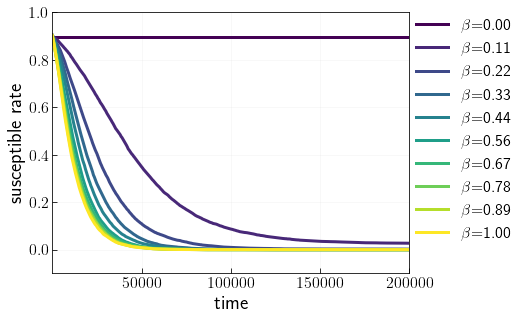

In [164]:
colormap = plt.cm.get_cmap('viridis', len(betas))

for i, df in enumerate(dfs):
    plt.plot(df.step, df.susceptibleRate, label=fr'$\beta$={betas[i]}', color=colormap(i))

plt.ylabel('susceptible rate')
plt.xlabel("time")
plt.xlim(1, 200000)
plt.ylim(-0.1, 1)
plt.legend(loc=(1, 0.1))

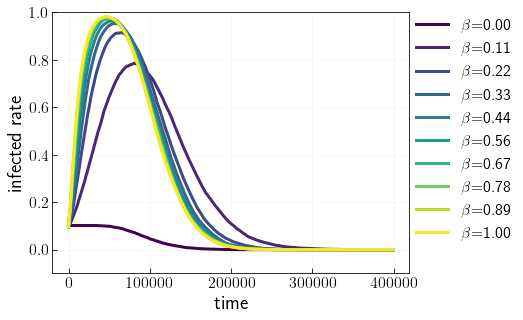

In [165]:
for i, df in enumerate(dfs):
    plt.plot(df.step, df.infectedRate, label=fr'$\beta$={betas[i]}', color=colormap(i))

plt.ylabel('infected rate')
plt.xlabel("time")
# plt.xlim(1, 200000)
plt.ylim(-0.1, 1)
plt.legend(loc=(1, 0.1))

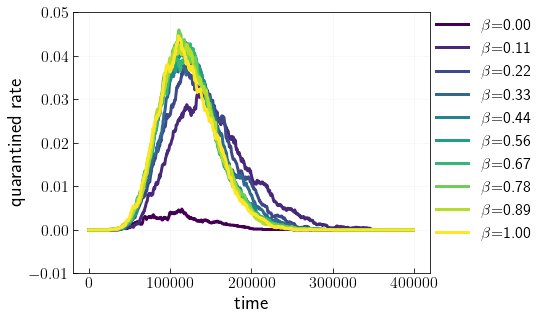

In [166]:
for i, df in enumerate(dfs):
    plt.plot(df.step, df.quarantinedRate, label=fr'$\beta$={betas[i]}', color=colormap(i))

plt.ylabel('quarantined rate')
plt.xlabel("time")
# plt.xlim(1, 200000)
plt.ylim(-0.01, 0.05)
plt.legend(loc=(1, 0.1))

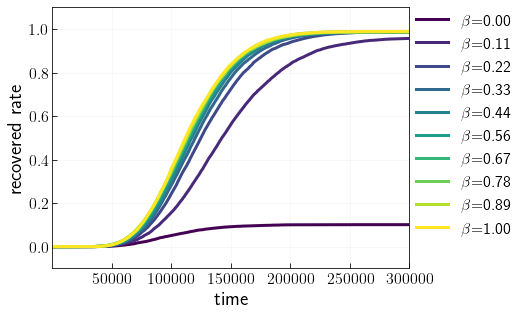

In [167]:
for i, df in enumerate(dfs):
    plt.plot(df.step, df.recoveredRate, label=fr'$\beta$={betas[i]}', color=colormap(i))

plt.ylabel('recovered rate')
plt.xlabel("time")
plt.xlim(1, 300000)
plt.ylim(-0.1, 1.1)
plt.legend(loc=(1, 0.1))

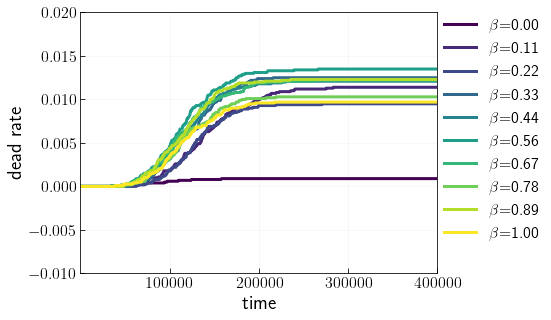

In [168]:
for i, df in enumerate(dfs):
    plt.plot(df.step, df.deadRate, label=fr'$\beta$={betas[i]}', color=colormap(i))

plt.ylabel('dead rate')
plt.xlabel("time")
plt.xlim(1, 400000)
plt.ylim(-0.01, 0.02)
plt.legend(loc=(1, 0.1))

In [169]:
n = 6
colors = ['blue', 'black', 'red', 'green', 'violet']
colors = ['xkcd:' + c for c in colors]

def plot_epidemic(n, legend=True):
    df = dfs[n]
    beta = betas[n]

    plt.plot(df.step, df.susceptibleRate, label='susceptible rate', color=colors[0])
    plt.plot(df.step, df.deadRate, label='dead rate', color=colors[1])
    plt.plot(df.step, df.infectedRate, label='infected rate', color=colors[2])
    plt.plot(df.step, df.recoveredRate, label='recovered rate', color=colors[3])
    plt.plot(df.step, df.quarantinedRate, label='quarantine rate', color=colors[4])

    plt.xlabel("time")
    plt.xlim(1, 400000)
    plt.ylim(-0.1, 1)
    if legend:
        plt.legend(loc=(0.4, 0.25), title=rf'$\beta$={beta}', title_fontsize=20)

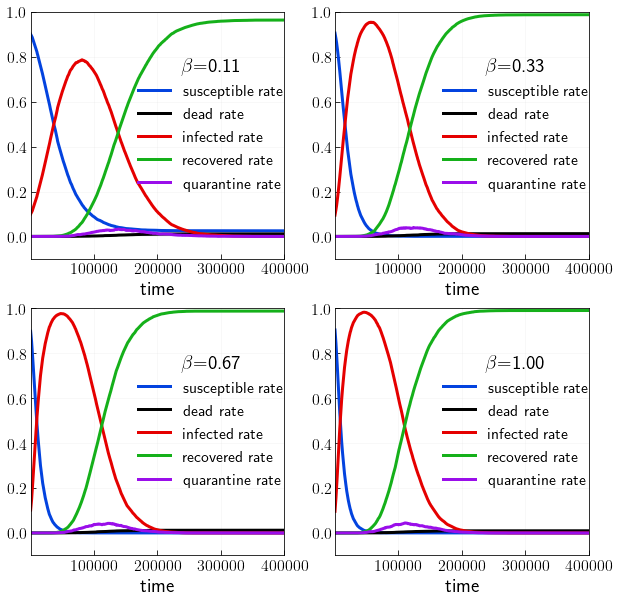

In [170]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plot_epidemic(1)

plt.subplot(2, 2, 2)
plot_epidemic(3)

plt.subplot(2, 2, 3)
plot_epidemic(6)

plt.subplot(2, 2, 4)
plot_epidemic(9)